### Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column. Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial. (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [1]:
import pandas as pd 
import numpy as np
import os
os.chdir('D:/Datasets/')

gold_data=pd.read_csv('GOLD.csv')
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [2]:
gold_data.set_index('Date',inplace=True)
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [3]:
gold_without_nan=gold_data.dropna()
gold_without_nan.shape

(411, 8)

Slope :  [[-0.00823083]]
Intercept :  [343.67028421]
Root Mean Squared Error :  73300.46132887459
R2 Score :  3.732507600850976e-05


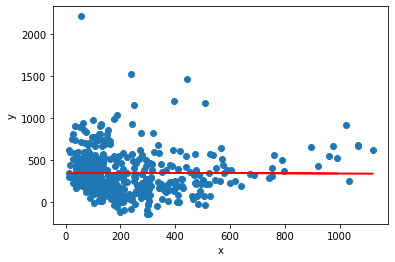

In [4]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

x=np.array(gold_without_nan['new'])
y=np.array(gold_without_nan['Pred'])
x=x.reshape(-1,1)
y=y.reshape(-1,1)

reg=LinearRegression()
reg.fit(x,y)
pred_y=reg.predict(x)

rmse=mean_squared_error(y,pred_y)
r2=r2_score(y,pred_y)

print('Slope : ',reg.coef_)
print('Intercept : ',reg.intercept_)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',r2)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,pred_y,color='r')
plt.show()

In [5]:
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [6]:
pre_data=gold_data[:]
pre_data_new=pre_data['new']
pre_data_new=pre_data_new.values.reshape(-1,1)
na_data=(reg.predict(pre_data_new))
na_data_series=pd.Series(na_data.ravel())
sata=na_data_series.to_frame()
gold_data['Pred']=sata.values
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305


Slope :  [[-0.00823083]]
Intercept :  [343.67028421]
Root Mean Squared Error :  3.325837576411786e-27
R2 Score :  1.0


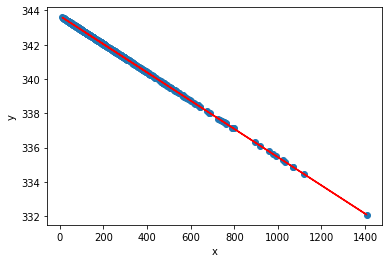

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

x=gold_data['new']
y=gold_data['Pred']
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

logreg=LinearRegression()
logreg.fit(x,y)
predict_y=logreg.predict(x)

rmse=mean_squared_error(y,predict_y)
r2=r2_score(y,predict_y)

print('Slope : ',logreg.coef_)
print('Intercept : ',logreg.intercept_)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',r2)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,predict_y,color='r')
plt.show()

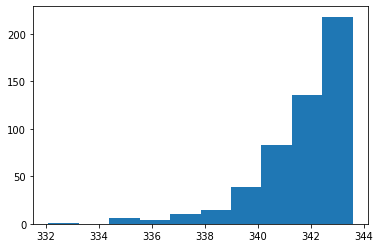

In [8]:
plt.hist(gold_data['Pred'])
plt.show()

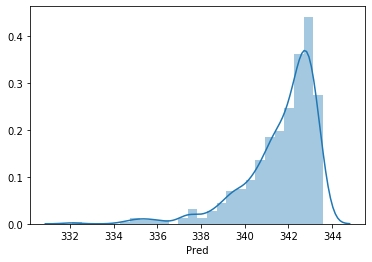

In [9]:
import seaborn as sns
sns.distplot(gold_data['Pred'])
plt.show()

### Import the stock of your choosing AND the Nifty index. Using linear regression (OLS), calculate - The daily Beta value for the past 3 months. (Daily= Daily returns) The monthly Beta value. (Monthly= Monthly returns) Refrain from using the (covariance(x,y)/variance(x)) formula. Attempt the question using regression.(Regression Reference) Were the Beta values more or less than 1 ? What if it was negative ? Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [10]:
df=pd.read_csv('LT.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')
df.set_index('Date',inplace=True)
df

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,LT,EQ,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
2019-05-08,LT,EQ,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
2019-05-09,LT,EQ,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30


In [11]:
df_Nifty=pd.read_csv('Nifty50.csv')
df_Nifty['Date']=pd.to_datetime(df_Nifty['Date'])
df_Nifty=df_Nifty.sort_values('Date')
df_Nifty.set_index('Date',inplace=True)
df_Nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [12]:
fil_LT=df[405:]
fil_Nif=df_Nifty[405:]

return_LT=fil_LT['Close Price'].pct_change()
return_Nifty=fil_Nif['Close'].pct_change()

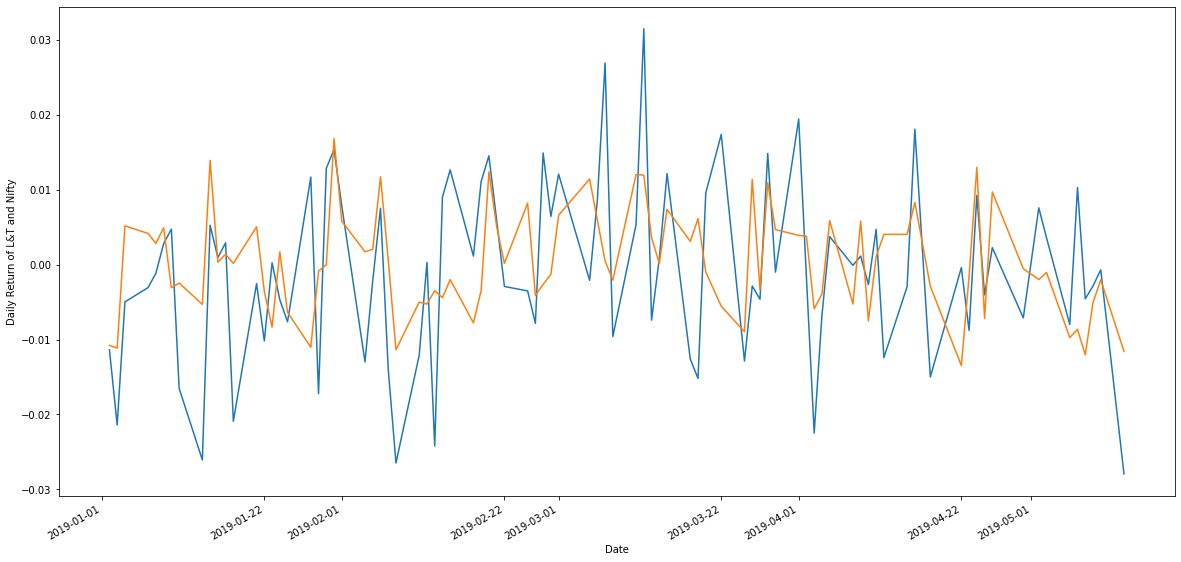

In [13]:
plt.figure(figsize=(20,10))
return_LT.plot()
return_Nifty.plot()
plt.ylabel('Daily Return of L&T and Nifty')
plt.show()

In [14]:
fil_LT['pct_change']=fil_LT['Close Price'].pct_change()
fil_Nif['pct_change']=fil_Nif['Close'].pct_change()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
x=fil_LT['pct_change'].dropna()
y=fil_Nif['pct_change'].dropna()
import statsmodels.api as sm

mymodel=sm.OLS(y,x).fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_change   R-squared (uncentered):                   0.174
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              18.29
Date:                Mon, 11 May 2020   Prob (F-statistic):                    4.84e-05
Time:                        10:16:11   Log-Likelihood:                          321.49
No. Observations:                  88   AIC:                                     -641.0
Df Residuals:                      87   BIC:                                     -638.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.2421      0.057      4.277      0.000       0.130       0.355
==============================================================================
Omnibus:                        2.093   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.479
Skew:                          -0.070   Prob(JB):                        0.477
Kurtosis:                       2.380   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lt=pd.read_csv('LT.NS.csv',parse_dates=True,index_col='Date')
nifty50=pd.read_csv('^NSEI.csv',parse_dates=True,index_col='Date')

monthly_prices=pd.concat([lt['Close'],nifty50['Close']],axis=1)
monthly_prices.columns=['LT','NIFTY50']

print(monthly_prices.head())

monthly_returns=monthly_prices.pct_change(1)
clean_monthly_return=monthly_returns.dropna(axis=0)
print(clean_monthly_return.head())

                     LT      NIFTY50
Date                                
2014-01-01   657.267029  6089.500000
2014-02-01   739.767029  6276.950195
2014-03-01   847.932983  6704.200195
2014-04-01   862.732971  6696.399902
2014-05-01  1030.329956  7229.950195
                  LT   NIFTY50
Date                          
2014-02-01  0.125520  0.030783
2014-03-01  0.146216  0.068066
2014-04-01  0.017454 -0.001163
2014-05-01  0.194263  0.079677
2014-06-01  0.101074  0.052753


In [17]:
x=clean_monthly_return['LT']
y=clean_monthly_return['NIFTY50']

x1=sm.add_constant(x)

model=sm.OLS(y,x1)

results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     48.46
Date:                Mon, 11 May 2020   Prob (F-statistic):           5.00e-08
Time:                        10:22:47   Log-Likelihood:                 80.478
No. Observations:                  36   AIC:                            -157.0
Df Residuals:                      34   BIC:                            -153.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.004      1.144      0.2

The Monthly beta value for the stock LT is 0.3636 which is less than 1 and hence is less volatile than the benchmark.